In [4]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import scipy.signal
import nana
from astropy import units as u

In [2]:
search_result = lk.search_lightcurve('KIC 5202905', mission='Kepler')
lc_collection = search_result.download_all()

In [18]:
#create a delta f (1/tmax-min aka 1/total observation time
#delta_f = 1/lc.time[-1] - lc.time[0] #this is in days
lc = lc_collection.stitch()
total_observation_time = lc.time[-1] - lc.time[0]
print(total_observation_time)
f_min = (1/total_observation_time.value)
print(delta_f)

1470.4622572100852
0.0006800582572566702


In [32]:
sampling_rate_days= np.median(np.diff(lc.time))
f_max = (1 / (sampling_rate_days)).value
print(f_max)

48.93900034783809


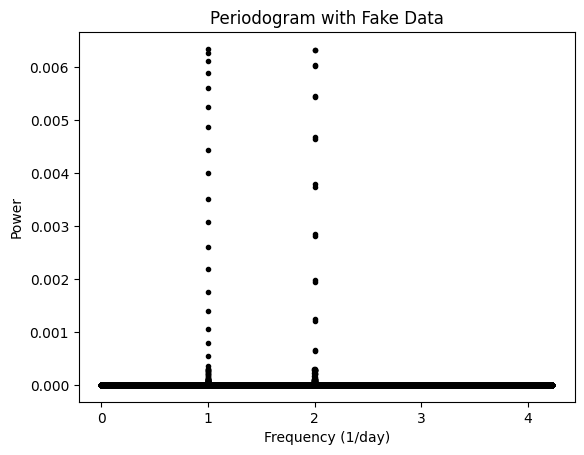

In [87]:
##using LightKurve Periodogram function, WITH DAYS!

time = np.arange(0, total_observation_time.value, sampling_rate_days.value)
flux =  1+ 0.01 * np.cos(2 * np.pi * time) + 0.01* np.cos(4 * np.pi * time) + 0.001 * np.random.normal(size=time.shape) #fake flux data


lc_fake = lk.LightCurve(time=time, flux=flux) #light curve will automatically assume 
#time is in days

frequency_grid_fake = np.arange(f_min, f_max, f_min) 

pg_fake = lc_fake.to_periodogram(
    #method='lombscargle',
    normalization='psd',
    frequency=frequency_grid_fake
)

fake_power = pg_fake.power.value

##IMPORTANT: when lightcurve uses to_periodogram(), it automatically converts to microhertz for some reason, so we must convert it back to days

fake_freq = pg_fake.frequency.to(1/u.day).value 
#fake_freq = pg_fake.frequency.value

plt.plot(fake_freq, fake_power,'k.')
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.title("Periodogram with Fake Data")
plt.show() 

In [61]:
fake_ind = nana.get_started(2, fake_freq, fake_power)
print(fake_ind)

[17018 34037]


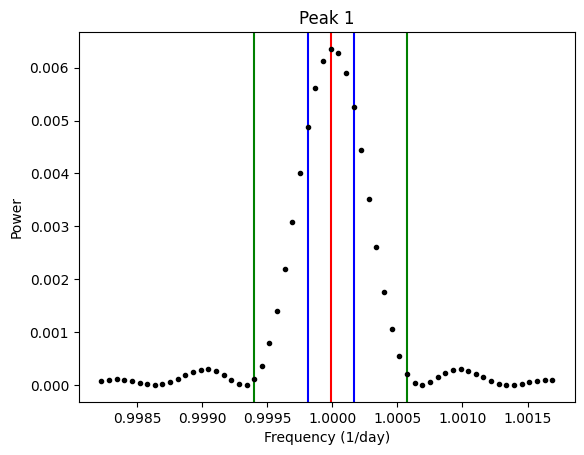

In [80]:
#Plot peak at 17018
plt.title("Peak 1")
plt.axvline(x = fake_freq[17018], color = 'red')
plt.axvline(x = fake_freq[17018-3], color = 'b')
plt.axvline(x = fake_freq[17018+3], color = 'b')
plt.axvline(x = fake_freq[17018-10], color = 'g')
plt.axvline(x = fake_freq[17018+10], color = 'g')
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.plot(fake_freq[17018-30:17018+30], fake_power[17018-30:17018+30], 'k.')

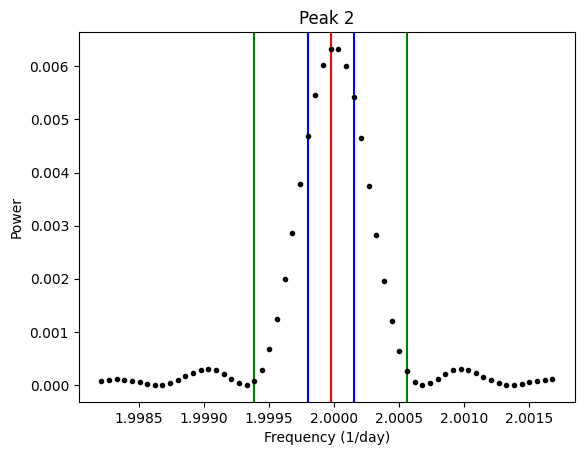

In [81]:
#Plot peak at 34037
plt.title("Peak 2")
plt.axvline(x = fake_freq[34037], color = 'red')
plt.axvline(x = fake_freq[34037-3], color = 'b')
plt.axvline(x = fake_freq[34037+3], color = 'b')
plt.axvline(x = fake_freq[34037-10], color = 'g')
plt.axvline(x = fake_freq[34037+10], color = 'g')
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.plot(fake_freq[34037-30:34037+30], fake_power[34037-30:34037+30], 'k.')

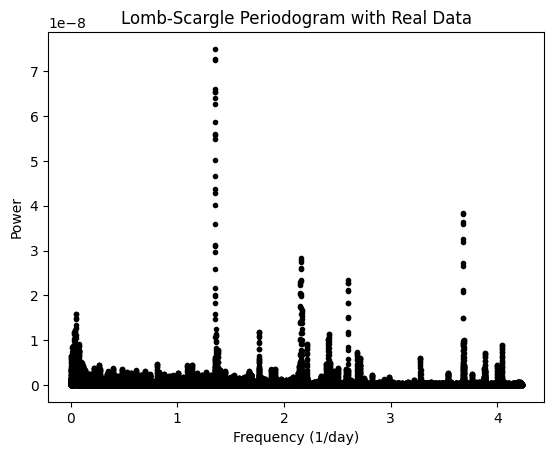

In [71]:
##Doing the same thing with real data
time = np.arange(0, total_observation_time.value, sampling_rate_days.value)
flux =  1+ 0.01 * np.cos(2 * np.pi * time) + 0.01* np.cos(4 * np.pi * time) + 0.001 * np.random.normal(size=time.shape) #fake flux data


#time is in days

frequency_grid = np.arange(f_min, f_max, f_min) 

pg_real = lc.to_periodogram(
    #method='lombscargle',
    normalization='psd',
    frequency=frequency_grid_fake
)

real_power = pg_real.power.value
real_freq = pg_real.frequency.to(1/u.day).value 

plt.plot(real_freq, real_power,'k.')
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram with Real Data")
plt.show() 

In [74]:
##Plotting the top 10 peaks in data
indx = nana.get_started(10,real_freq,real_power)

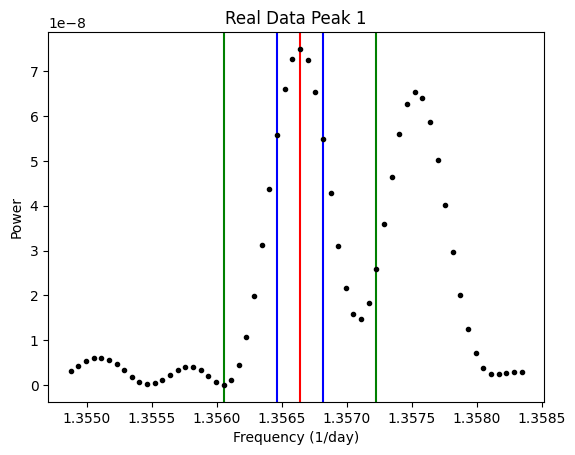

In [82]:
#Plot peak at 23088
plt.title("Real Data Peak 1")
plt.axvline(x = real_freq[indx[0]], color = 'red')
plt.axvline(x = real_freq[indx[0]-3], color = 'b')
plt.axvline(x = real_freq[indx[0]+3], color = 'b')
plt.axvline(x = real_freq[indx[0]-10], color = 'g')
plt.axvline(x = real_freq[indx[0]+10], color = 'g')
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.plot(real_freq[indx[0]-30:indx[0]+30], real_power[indx[0]-30:indx[0]+30], 'k.')

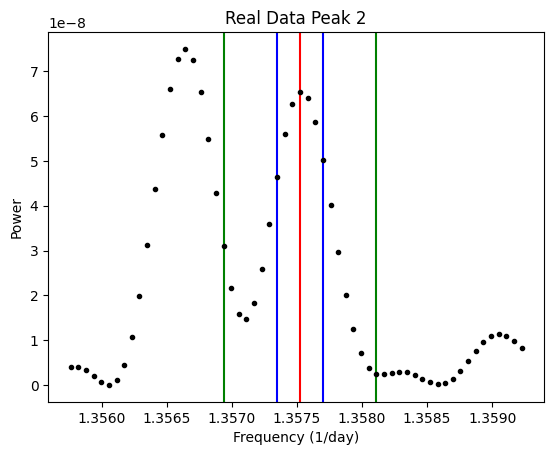

In [83]:
#Plot peak at 23088
plt.title("Real Data Peak 2")
plt.axvline(x = real_freq[indx[1]], color = 'red')
plt.axvline(x = real_freq[indx[1]-3], color = 'b')
plt.axvline(x = real_freq[indx[1]+3], color = 'b')
plt.axvline(x = real_freq[indx[1]-10], color = 'g')
plt.axvline(x = real_freq[indx[1]+10], color = 'g')
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.plot(real_freq[indx[1]-30:indx[1]+30], real_power[indx[1]-30:indx[1]+30], 'k.')

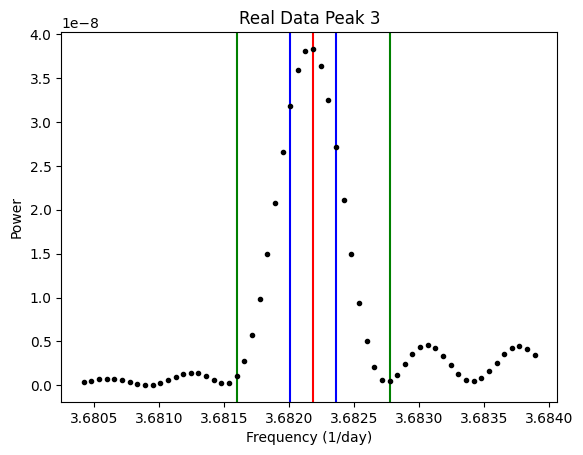

In [84]:
#Plot Thirds Peak
plt.title("Real Data Peak 3")
plt.axvline(x = real_freq[indx[2]], color = 'red')
plt.axvline(x = real_freq[indx[2]-3], color = 'b')
plt.axvline(x = real_freq[indx[2]+3], color = 'b')
plt.axvline(x = real_freq[indx[2]-10], color = 'g')
plt.axvline(x = real_freq[indx[2]+10], color = 'g')
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.plot(real_freq[indx[2]-30:indx[2]+30], real_power[indx[2]-30:indx[2]+30], 'k.')

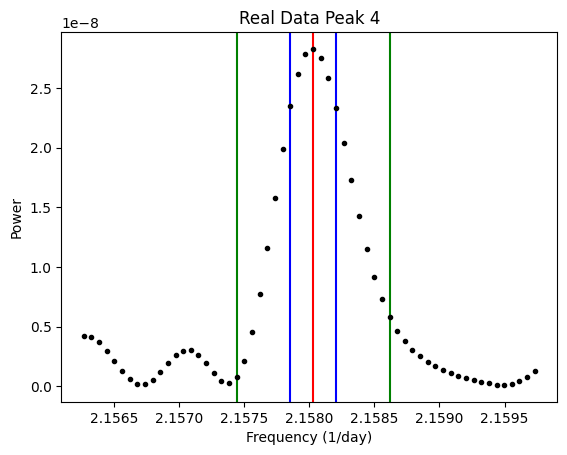

In [85]:
#Plot Fourth Peak
plt.title("Real Data Peak 4")
plt.axvline(x = real_freq[indx[3]], color = 'red')
plt.axvline(x = real_freq[indx[3]-3], color = 'b')
plt.axvline(x = real_freq[indx[3]+3], color = 'b')
plt.axvline(x = real_freq[indx[3]-10], color = 'g')
plt.axvline(x = real_freq[indx[3]+10], color = 'g')
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.plot(real_freq[indx[3]-30:indx[3]+30], real_power[indx[3]-30:indx[3]+30], 'k.')

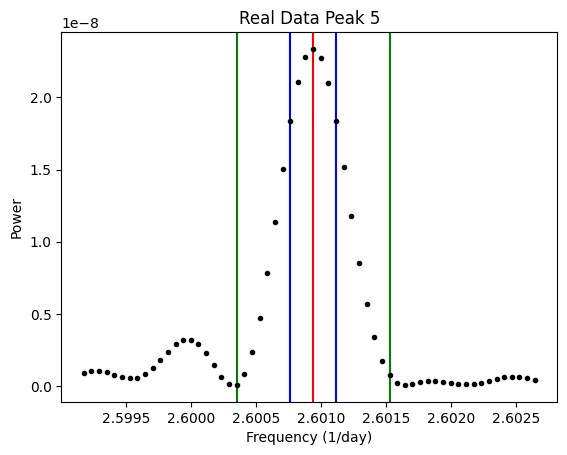

In [86]:
#Plot Fifth Peak
plt.title("Real Data Peak 5")
plt.axvline(x = real_freq[indx[4]], color = 'red')
plt.axvline(x = real_freq[indx[4]-3], color = 'b')
plt.axvline(x = real_freq[indx[4]+3], color = 'b')
plt.axvline(x = real_freq[indx[4]-10], color = 'g')
plt.axvline(x = real_freq[indx[4]+10], color = 'g')
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.plot(real_freq[indx[4]-30:indx[4]+30], real_power[indx[4]-30:indx[4]+30], 'k.')

In [107]:
#threshold function with original parameters, now that frequency spacing is accurate
def threshold10(indices, xs, ys):
    good_peaks = []
    for i in indices:
        leftside = ys[i-10:i]  
        rightside = ys[i+1:i+11]
        median = np.nanmedian(np.concatenate((leftside,rightside)))
        if ys[i] > 5*median:
            good_peaks.append(i)
            print("good peak identified")
    return np.array(good_peaks)

In [108]:
#No good peaks with real data
good_peaks_real = threshold10(indx, real_freq, real_power)
print(good_peaks)

[]


In [109]:
#No good peaks with fake data
good_peaks_fake = threshold10(fake_ind, fake_freq, fake_power)
print(good_peaks_fake)

[]


In [110]:
#threhosld with +- 15 frequency spacing???
def threshold15(indices, xs, ys):
    good_peaks = []
    for i in indices:
        leftside = ys[i-15:i]  
        rightside = ys[i+1:i+16]
        median = np.nanmedian(np.concatenate((leftside,rightside)))
        if ys[i] > 5*median:
            good_peaks.append(i)
            print("good peak identified")
    return np.array(good_peaks)

In [111]:
#Peaks in real data with wider parameters
good_peaks_real2 = threshold15(indx, real_freq, real_power)
print(good_peaks_real2)

good peak identified
good peak identified
good peak identified
good peak identified
[62667 44265 36563 36970]


In [112]:
#Peaks in fake data with wider parameters
good_peaks_fake2 = threshold15(fake_ind, fake_freq, fake_power)
print(good_peaks_fake2)

good peak identified
good peak identified
[17018 34037]


In [130]:
##More concise threshold function
def threshold_concise(indices, xs, ys):
    return np.array([i for i in indices if ys[i] > 5 * np.nanmedian(np.concatenate((ys[i-15:i], ys[i+1:i+16])))])

In [131]:
check = threshold_concise(indx, real_freq, real_power)
peak = threshold15(indx, real_freq, real_power)
print(check, peak)

good peak identified
good peak identified
good peak identified
good peak identified
[62667 44265 36563 36970] [62667 44265 36563 36970]


In [8]:
def get_vals_kep(starID):
    search_result = lk.search_lightcurve(starID, mission='Kepler')
    lc = search_result.download_all().stitch()
    fmin = (1/(lc.time[-1] - lc.time[0])).value
    pg = lc.to_periodogram(
        method = 'lombscargle',
        normalization = 'psd',
        frequency = np.arange(fmin, (1 / (np.median(np.diff(lc.time)).value)),fmin))

    return np.array(pg.frequency.to(1/u.day).value),  np.array(pg.power.value)

In [10]:
vals = get_vals_kep("KIC 7917485")